Longitud de R1: 30986


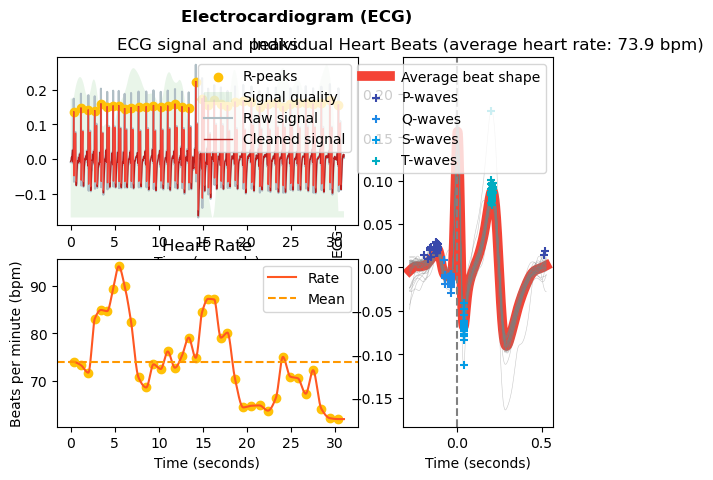

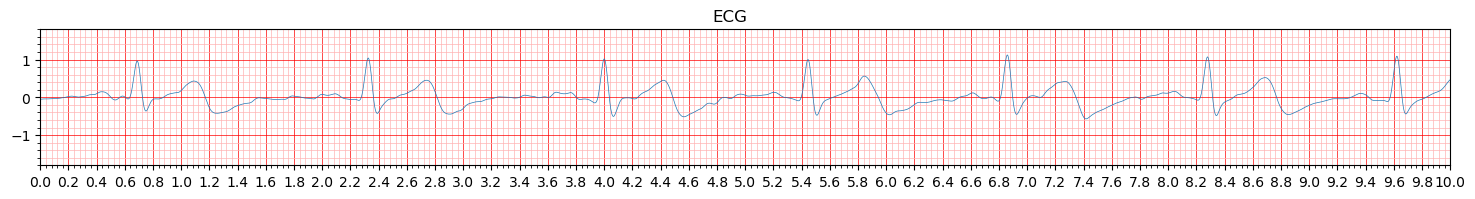

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt  # Corrige el import
import ecg_plot
# Cargar y verificar la señal original
R1 = funcion_leer("basal/R1.txt")
R1 = (R1 / max(R1)) * 1.2  # Escala de 0-1023 a 0-1.2 V
print("Longitud de R1:", len(R1))  # Verifica si la señal original es válida

# Limpiar la señal y verificar su longitud
R1_cleaned = nk.ecg_clean(R1, sampling_rate=1000)


# Procesar y graficar si la señal limpiada tiene longitud válida
if len(R1_cleaned) > 0:
    signals, info = nk.ecg_process(R1_cleaned, sampling_rate=1000)
    nk.ecg_plot(signals, info)
    R1_cleaned=(R1_cleaned / max(R1_cleaned)) * 1.5
    ecg_plot.plot_1(R1_cleaned[0:5000])
    plt.show()
else:
    print("Error: R1_cleaned está vacía. Revisa la señal original y el proceso de limpieza.")


Longitud de R1: 30986
Longitud de R1_cleaned: 30986


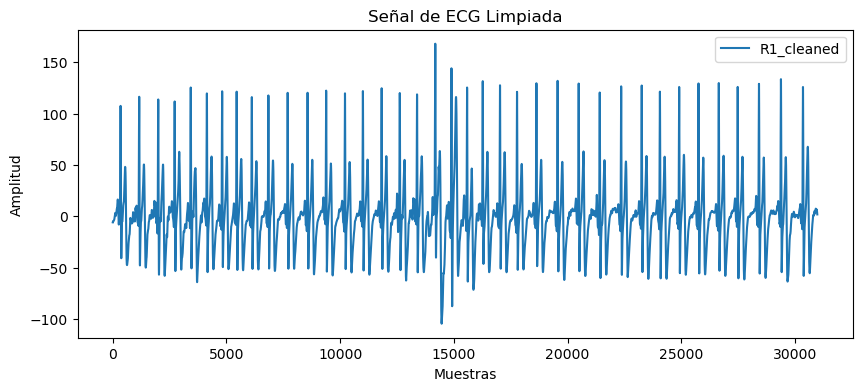

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
Reporte de Análisis de ECG:
  ECG_Rate_Mean             HRV_MeanNN               HRV_SDNN HRV_SDANN1  \
0      73.93707  [[811.1081081081081]]  [[92.21285273870564]]    [[nan]]   

  HRV_SDNNI1 HRV_SDANN2 HRV_SDNNI2 HRV_SDANN5 HRV_SDNNI5  \
0    [[nan]]    [[nan]]    [[nan]]    [[nan]]    [[nan]]   

               HRV_RMSSD  ...              HRV_SampEn             HRV_ShanEn  \
0  [[55.13569120310767]]  ...  [[1.5040773967762742]]  [[5.155399311574897]]   

              HRV_FuzzyEn HRV_MSEn HRV_CMSEn HRV_RCMSEn  \
0  [[1.1166425740614596]]  [[0.0]]   [[0.0]]    [[0.0]]   

                   HRV_CD                 HRV_HFD                 HRV_KFD  \
0  [[2.0437302820665257]]  [[1.6171827097493285]]  [[2.4909943657910856]]   

                  HRV_LZC  
0  [[1.1263682952711243]]  

[1 rows x 83 columns]


c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


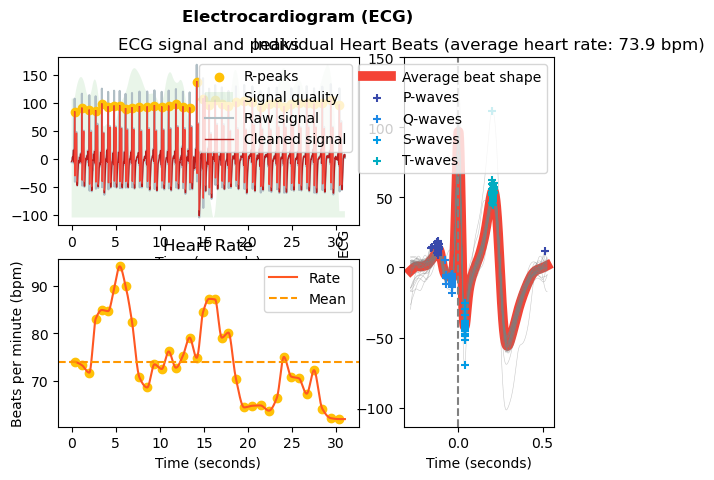

In [46]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Cargar y verificar la señal original
R1 = funcion_leer("basal/R1.txt")
print("Longitud de R1:", len(R1))  # Verifica si la señal original es válida

# Limpiar la señal y verificar su longitud
R1_cleaned = nk.ecg_clean(R1, sampling_rate=1000)
print("Longitud de R1_cleaned:", len(R1_cleaned))  # Verifica si la señal limpia es válida

# Graficar la señal limpia
plt.figure(figsize=(10, 4))
plt.plot(R1_cleaned, label="R1_cleaned")
plt.title("Señal de ECG Limpiada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# Procesar y analizar la señal si tiene una longitud válida
if len(R1_cleaned) > 0:
    # Procesar la señal de ECG
    signals, info = nk.ecg_process(R1_cleaned, sampling_rate=1000)



    print(type(signals))
    print(type(R1_cleaned))
    
    # Graficar la señal procesada
    nk.ecg_plot(signals, info)
    
    # Analizar la señal de ECG
    report = nk.ecg_analyze(signals, sampling_rate=1000)
    
    # Mostrar el reporte de análisis
    print("Reporte de Análisis de ECG:")
    print(report)
else:
    print("Error: R1_cleaned está vacía. Revisa la señal original y el proceso de limpieza.")


In [64]:
print(type(signals))
print(signals)
print(type(R1_cleaned))

<class 'pandas.core.frame.DataFrame'>
        ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0     -0.009446  -0.006939  73.972877     0.786739            0            0   
1     -0.009288  -0.006833  73.972877     0.786739            0            0   
2     -0.009111  -0.006727  73.972877     0.786739            0            0   
3     -0.008921  -0.006624  73.972877     0.786739            0            0   
4     -0.008731  -0.006523  73.972877     0.786739            0            0   
...         ...        ...        ...          ...          ...          ...   
30981  0.004777   0.007648  61.919505     0.000000            0            0   
30982  0.004352   0.007285  61.919505     0.000000            0            0   
30983  0.003919   0.006918  61.919505     0.000000            0            0   
30984  0.003482   0.006549  61.919505     0.000000            0            0   
30985  0.003045   0.006178  61.919505     0.000000            0            0   

 

In [ ]:
import neurokit2 as nk
import matplotlib.pyplot as plt

def procesar_ecg(signal_raw, sampling_rate=1000, max_voltage=1.5):
    """
    Procesa y analiza una señal de ECG cruda, escala la señal a un voltaje específico,
    y devuelve los resultados del análisis junto con una gráfica de la señal.

    Parámetros:
        signal_raw (array-like): Señal de ECG en crudo.
        sampling_rate (int): Tasa de muestreo en Hz (default es 1000).
        max_voltage (float): Voltaje máximo de escala después del procesamiento (default es 1.5 V).

    Retorna:
        report (DataFrame): Reporte del análisis de ECG.
        signals (DataFrame): Señal procesada con información adicional.
        info (dict): Información adicional sobre el procesamiento de ECG.
    """
    # Escalar la señal cruda al rango de 0 a 1.2 V
    signal_scaled = (signal_raw / max(signal_raw)) * 1.2
    print("Longitud de la señal escalada:", len(signal_scaled))

    # Limpiar la señal
    signal_cleaned = nk.ecg_clean(signal_scaled, sampling_rate=sampling_rate)

    # Verificar si la señal limpiada tiene longitud válida
    if len(signal_cleaned) > 0:
        # Procesar la señal
        signals, info = nk.ecg_process(signal_cleaned, sampling_rate=sampling_rate)
        
        # Analizar la señal
        report = nk.ecg_analyze(signals, sampling_rate=sampling_rate)

        # Escalar la señal limpiada a un nuevo voltaje máximo (1.5 V en este caso)
        signal_cleaned_scaled = (signal_cleaned / max(signal_cleaned)) * max_voltage

        # Graficar la señal escalada y limpiada
        ecg_plot.plot_1(signal_cleaned_scaled[0:5000])
        nk.ecg_plot(signals, info)

        return report, signals, info
    else:
        print("Error: La señal limpiada está vacía. Revisa la señal original y el proceso de limpieza.")
        return None, None, None

# Ejemplo de uso



Longitud de la señal escalada: 30986


c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


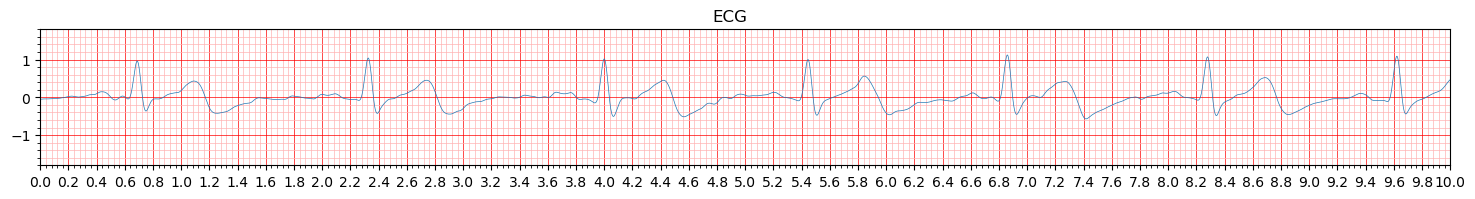

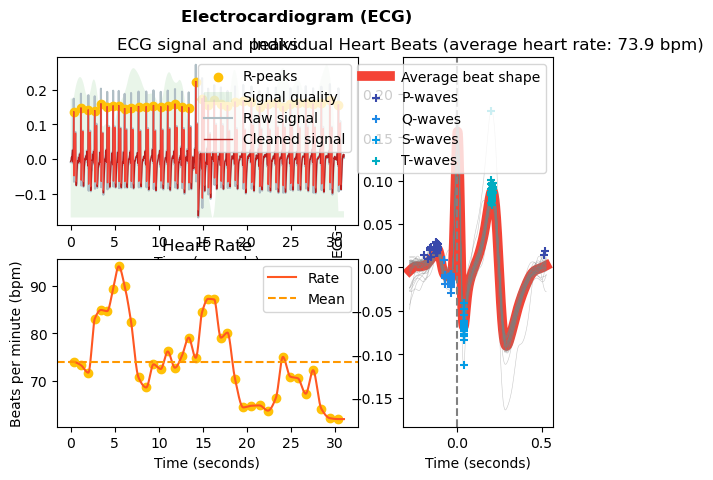

In [ ]:
R1 = funcion_leer("basal/R1.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R1)

Longitud de la señal escalada: 60097


c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


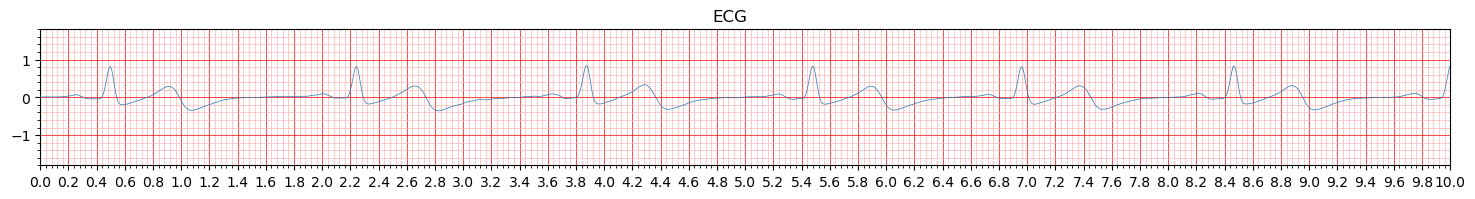

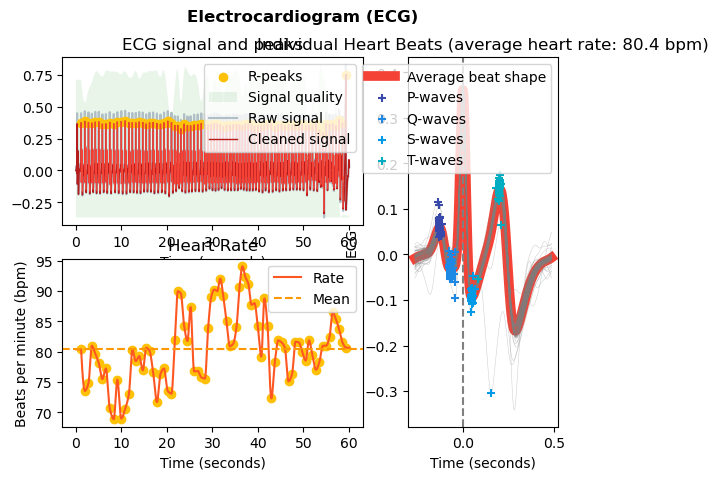

In [77]:
R2 = funcion_leer("basal/R2.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R2)

In [35]:
import neurokit2 as nk
import pandas as pd
import numpy as np
def my_processing(ecg_signal):
    # Do processing
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=1000)
    instant_peaks, rpeaks, = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)
    rate = nk.ecg_rate(rpeaks, sampling_rate=1000, desired_length=len(ecg_cleaned))
    quality = nk.ecg_quality(ecg_cleaned, sampling_rate=1000)


    # Prepare output
    signals = pd.DataFrame({"ECG_Raw": ecg_signal,
                            "ECG_Clean": ecg_cleaned,
                            "ECG_Rate": rate,
                            "ECG_Quality": quality})
    signals = pd.concat([signals, instant_peaks], axis=1)

    # Create info dict
    info = rpeaks
    info["sampling_rate"] = 1000
    
    return signals, info

# Función para leer el archivo de texto y extraer la señal de ECG
def funcion_leer(nombre):
    # Leer el archivo
    with open(nombre, 'r') as file:
        # Saltar las líneas de encabezado hasta que termine el EndOfHeader
        while True:
            line = file.readline()
            if "EndOfHeader" in line:
                break
        
        # Cargar los datos en un DataFrame
        data = pd.read_csv(file, delimiter='\t', header=None)
        
    # Seleccionar solo la quinta columna (índice 4 ya que Python empieza desde 0)
    columna_5 = data.iloc[:, 5]
    # Convertir la columna a un array de NumPy
    array_np = np.array(columna_5)
    return array_np

Longitud de la señal escalada: 30986


c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


<Figure size 1200x800 with 0 Axes>

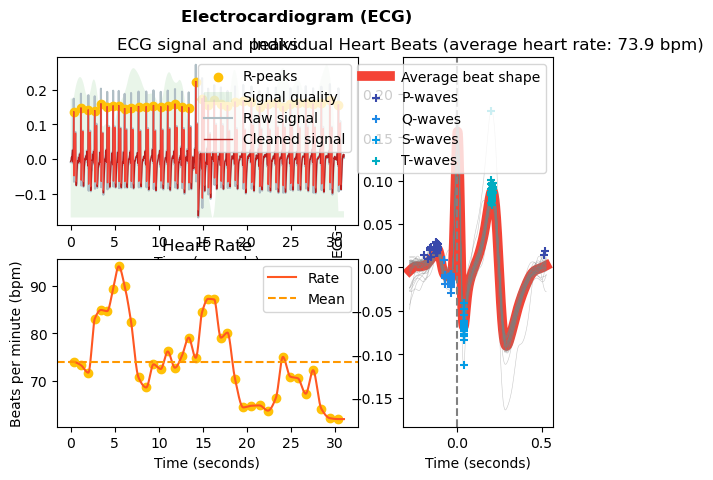

In [71]:
import neurokit2 as nk
import matplotlib.pyplot as plt

def procesar_ecg(signal_raw, sampling_rate=1000, max_voltage=1.5):
    """
    Procesa y analiza una señal de ECG cruda, escala la señal a un voltaje específico,
    y devuelve los resultados del análisis junto con una gráfica de la señal.

    Parámetros:
        signal_raw (array-like): Señal de ECG en crudo.
        sampling_rate (int): Tasa de muestreo en Hz (default es 1000).
        max_voltage (float): Voltaje máximo de escala después del procesamiento (default es 1.5 V).

    Retorna:
        report (DataFrame): Reporte del análisis de ECG.
        signals (DataFrame): Señal procesada con información adicional.
        info (dict): Información adicional sobre el procesamiento de ECG.
    """
    # Escalar la señal cruda al rango de 0 a 1.2 V
    signal_scaled = (signal_raw / max(signal_raw)) * 1.2
    print("Longitud de la señal escalada:", len(signal_scaled))

    # Limpiar la señal
    signal_cleaned = nk.ecg_clean(signal_scaled, sampling_rate=sampling_rate)

    # Verificar si la señal limpiada tiene longitud válida
    if len(signal_cleaned) > 0:
        # Procesar la señal
        signals, info = nk.ecg_process(signal_cleaned, sampling_rate=sampling_rate)
        
        # Analizar la señal
        report = nk.ecg_analyze(signals, sampling_rate=sampling_rate)

        # Escalar la señal limpiada a un nuevo voltaje máximo (1.5 V en este caso)
        signal_cleaned_scaled = (signal_cleaned / max(signal_cleaned)) * max_voltage

        # Graficar la señal escalada y limpiada en una figura amplia

        
        # Graficar con nk.ecg_plot en tamaño ajustado
        plt.figure(figsize=(12, 8))  # Ajuste de tamaño de figura para nk.ecg_plot
        nk.ecg_plot(signals, info)

        return report, signals, info
    else:
        print("Error: La señal limpiada está vacía. Revisa la señal original y el proceso de limpieza.")
        return None, None, None

# Ejemplo de uso
R1 = funcion_leer("basal/R1.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R1)
